In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [5]:
# Create
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
# Input layer (4 features of the flower) -->
# Hidden Layer1 (number of neurons) -->
# H2 (n) -->
# output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):

    super().__init__()  # instantiate our nn.Module
    self.fc1 = nn. Linear(in_features, h1)
    self.fc2 = nn. Linear(h1, h2)
    self.out = nn. Linear (h2, out_features)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [6]:
# picked a random seed for randomization
torch.manual_seed(41)
# create an instance for model
model=Model()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data=pd.read_csv(url)
data


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [12]:
data['variety']=data['variety'].replace('Setosa',0.0)
data['variety']=data['variety'].replace('Virginica',1.0)
data['variety']=data['variety'].replace('Versicolor',2.0)
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,1.0
148,6.2,3.4,5.4,2.3,1.0


In [13]:
# converting into X and y
X=data.drop('variety',axis=1)
y=data['variety']


In [14]:
#convertig into numpy arrays

X=X.values
y=y.values

In [15]:
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)




In [21]:
# convert data into tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [22]:
# CONVERT data into tensors
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [23]:
# setting the criterion for our model
criterion=nn.CrossEntropyLoss()
# setting the loss function
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [24]:
# train our model
# Epochs (one run through all the training data in our network)

In [27]:
# train our model

epochs=100
losses=[]

for  i in range(epochs):
  # go forward and get prediction
  y_pred=model.forward(X_train)

  # measure the loss
  loss=criterion(y_pred,y_train)
  # keeptrack of all losses
  losses.append(loss.detach().numpy())

  # every 10 epoch
  if i%10==0:
    print(f'Epoch:{i} and loss:{loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()





Epoch:0 and loss:1.1396323442459106
Epoch:10 and loss:1.055252194404602
Epoch:20 and loss:0.9083729982376099
Epoch:30 and loss:0.6126042008399963
Epoch:40 and loss:0.3964517414569855
Epoch:50 and loss:0.25167784094810486
Epoch:60 and loss:0.14745105803012848
Epoch:70 and loss:0.08822901546955109
Epoch:80 and loss:0.06171940639615059
Epoch:90 and loss:0.04924152418971062


Text(0.5, 0, 'Epoch')

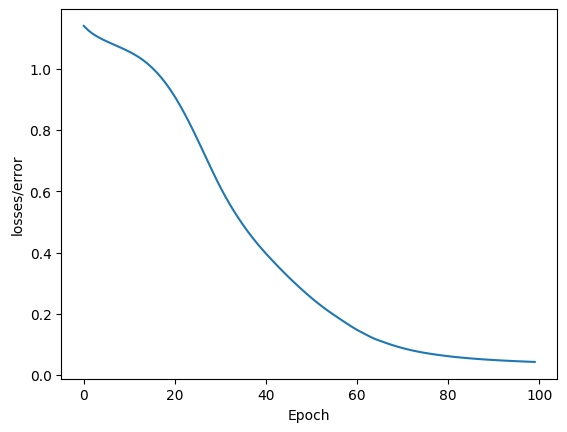

In [28]:
plt.plot(range(epochs),losses)
plt.ylabel("losses/error")
plt.xlabel("Epoch")

In [29]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [30]:
loss

tensor(0.0944)

In [33]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')
total=len(X_test)
accuracy = correct / total * 100
print(f'Accuracy: {accuracy:.2f}%')

1.)  tensor([-10.5105,  10.4962,   1.1769]) 	 1 	 1
2.)  tensor([-8.8031,  8.2884,  3.1315]) 	 1 	 1
3.)  tensor([-3.1736,  1.8004,  6.4822]) 	 2 	 2
4.)  tensor([-2.5880,  1.4896,  5.3905]) 	 2 	 2
5.)  tensor([ 14.1115, -14.8223,   6.9841]) 	 0 	 0
6.)  tensor([-8.5132,  8.1306,  2.6322]) 	 1 	 1
7.)  tensor([-2.7498,  1.5322,  5.8696]) 	 2 	 2
8.)  tensor([ 13.5528, -14.1079,   6.2848]) 	 0 	 0
9.)  tensor([-0.5036, -0.8487,  6.4613]) 	 2 	 2
10.)  tensor([-10.8617,  10.6703,   1.8811]) 	 1 	 1
11.)  tensor([ 14.5142, -15.1181,   6.7121]) 	 0 	 0
12.)  tensor([ 13.7062, -14.2233,   6.1870]) 	 0 	 0
13.)  tensor([ 12.6157, -13.2455,   6.3169]) 	 0 	 0
14.)  tensor([-1.9920,  0.8774,  5.4510]) 	 2 	 2
15.)  tensor([ 2.4821, -3.9723,  7.2100]) 	 2 	 2
16.)  tensor([-6.6125,  6.2889,  2.3770]) 	 1 	 1
17.)  tensor([-0.4178, -1.0692,  7.0688]) 	 2 	 2
18.)  tensor([-8.1551,  7.4847,  3.7645]) 	 1 	 1
19.)  tensor([ 12.8746, -13.4999,   6.3545]) 	 0 	 0
20.)  tensor([ 1.3236, -2.6427,  6.